# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Домашнее задание
Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
Методом nesterov momentum
Методом rmsprop
Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [2]:
X,y = load_iris(return_X_y=True)

In [3]:
X.shape

(150, 4)

In [4]:
filter = y != 2

In [5]:
X = X[filter]
y = y[filter]

In [6]:
X.shape

(100, 4)

In [7]:
y.shape

(100,)

# Логистическая регрессия

In [8]:
COEFS = np.random.randn(5)

In [9]:
def predict_proba(coefs, x):
  return 1. / (1. + np.exp( -(x.dot(coefs[:4]) + coefs[-1]) ) )

In [10]:
def predict_class(coefs, x):
  probas = predict_proba(coefs, x)
  return (probas > 0.5).astype(np.float)

In [11]:
def bce_loss(coefs, x, y):
  probas = predict_proba(coefs, x)
  filter_ones = y == 1
  loss = -1. * (np.sum(np.log(probas[filter_ones])) + np.sum(np.log(1. - probas[~filter_ones]))) / len(y)
  return loss

In [12]:
def grad(coefs, x, y):
  probas = predict_proba(coefs, x)
  delta = probas - y
  modified_x = x.T * delta
  deltas = np.mean(modified_x, axis=1)
  return deltas, np.mean(delta)

In [13]:
def learn_sgd(coefs, x, y, num_epochs=20, learning_rate=0.0001):
  losses = []
  for e in range(num_epochs):
    grad_coefs, grad_bias = grad(coefs, x, y)
    coefs[:-1] = coefs[:-1] - learning_rate * grad_coefs
    coefs[-1] = coefs[-1] - learning_rate * grad_bias
    loss = bce_loss(coefs, x, y)
    losses.append(loss)
  return losses, coefs

In [14]:
losses, new_coefs = learn_sgd(COEFS, X, y, learning_rate=0.1)

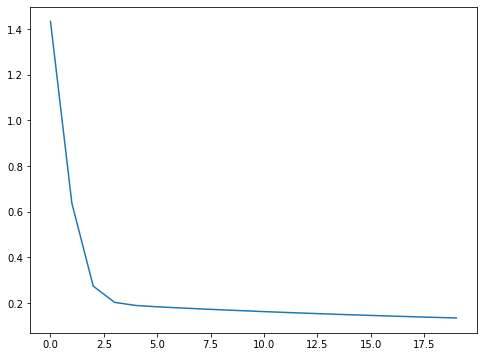

In [15]:
plt.figure(figsize=(8,6))
plt.plot(losses)
plt.show()

# Nesterov Accelerated Gradient

In [ ]:
def do_nesterov_accelerated_gradient_descent(coefs, x, y, num_epochs=20, learning_rate=0.0001, gamma =0.9):
 losses = []
    for i in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y)
        coefs[:-1] = coefs[:-1] - learning_rate * grad_coefs
        coefs[-1] = coefs[-1] - learning_rate * grad_bias
        loss = bce_loss(coefs, x, y)
        losses.append(loss)
 return losses, coefs

# Метод градиентного спуска

In [19]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

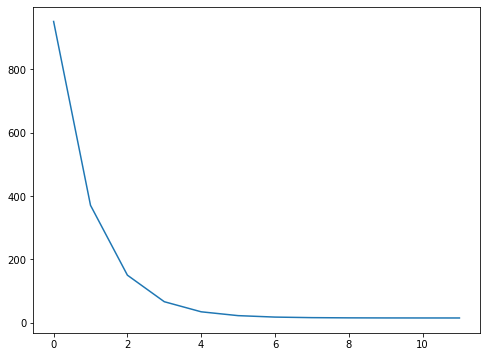

In [20]:
plt.figure(figsize=(8,6))
plt.plot(costs)
plt.show()

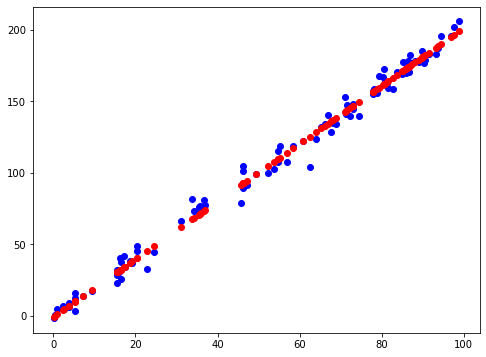

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

# Метод стохастического градиентного спуска

In [22]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

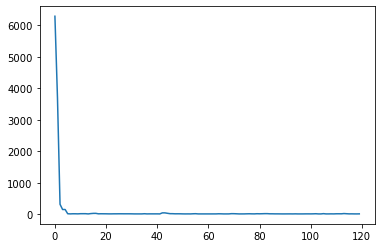

In [23]:
plt.plot(costs)
plt.show()

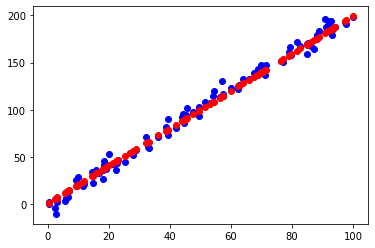

In [22]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

# Метод nesterov momentum

In [ ]:
import numpy as np

X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
	return 1.0/(1.0 + np.exp(-(w*x + b)))

def error(w, b):
	err = 0.0
	for x,y in data:
		fx = f(w,b,x)
		err += 0.5 * (fx - y) ** 2
	return err

def grad_b(w, b, x, y):
	fx = f(w,b,x)
	return (fx-y) * fx * (1 - fx)
	
def grad_w(w, b, x, y):
	fx = f(w,b,x)
	return (fx-y) * fx * (1 - fx) * x
	
def do_gradient_descent():
	w, b, eta, max_epochs = 1, 1, 0.01, 100
	for i in range(max_epochs):
		dw, db = 0, 0
		for x,y in zip(X, Y):
			dw += grad_w(w, b, x, y)
			db += grad_b(w, b, x, y)
		w = w - eta * dw
		b = b - eta * db
	print(error(w,b))

In [ ]:
def do_nesterov_accelerated_gradient_descent():
    w, b, eta = init_w, init_b, 1.0
    prev_v_w, prev_v_b, gamma = 0, 0, 0.9
    for i in range(max_epochs):
        dw, db = 0, 0
        # do partial update
        v_w = gamma * prev_v_w
        v_b = gamma * prev_v_b 
        for x,y in zip(X,Y):
          # calculate gradients after partial update
            dw += grad_w(w - v_w, b - v_b, x, y)
            db += grad_b(w - v_w, b - v_b, x, y)
        # now do the full update    
        v_w = gamma * prev_v_w + eta*dw
        v_b = gamma * prev_v_b + eta*db
        w = w - v_w
        b = b - v-b
        prev_v_w = v_w
        prev_v_b = v_b